In [1]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import wget
import torch

url = "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"
destination_path = "sam-weights/sam_vit_h_4b8939.pth"

if not os.path.exists(destination_path):
    wget.download(url, destination_path)
    print("-- weights downloaded --")
else:
    print("-- weights already downloaded --")

model_type = "vit_h"
sam_checkpoint = "sam-weights/sam_vit_h_4b8939.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

-- weights already downloaded --


In [3]:
from pathlib import Path

# own inmports
import utils.parse_geojson as pg
from model_SAMSegmentation import SAMSegmentation

# Example of geojson input
file_path = Path("data/geojson/Output5.geojson")

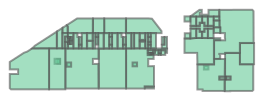

In [4]:
gc_raw = pg.load_geometrycollection_from_geojson(file_path)
gc_raw

In [ ]:
model = SAMSegmentation(model_type, sam_checkpoint, device)
y_pred = model(gc_raw)
print(f"{len(y_pred.geoms)} rooms found, displayed as a GeometryCollection:")
y_pred

Loading model vit_h from sam-weights/sam_vit_h_4b8939.pth
Model vit_h loaded.
Initiating SAM mask generator...
Predicting masks...
